# Exercício 2 - Computação Científica II 2019.2
> Gil Miranda<br>
> Repo: https://github.com/mirandagil/university-courses/tree/master/comp-cientifica-II-2019-2<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [223]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points on time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 03/09/2019
def f_euler(F, y0, ts, p = 0):
    ys = np.array([y0])  
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(tnext, ys[-1], p)*h
        ys = np.append(ys, ynext)
        t = tnext
    return ys

---
## Resolução dos exemplos do slide `Aula 3`

#### Funções que facilitam a vida

In [224]:
## Plota gráficos
def plotter(xs, ys, labels = [], title = 0):
    plt.figure(figsize=(8,5))
    if len(xs) != len(ys):
        if labels == []:
            for y in ys:
                plt.plot(xs, y)
        else:
            for (y,l) in zip(ys,labels):
                plt.plot(xs, y, label = l)
            plt.legend()
    else:
        if labels == []:
            for (x,y) in zip(xs,ys):
                plt.plot(x, y)
        else:
            for (x,y,l) in zip(xs,ys,labels):
                plt.plot(x, y, label = l)
            plt.legend()
    if title != 0:
        plt.title(title)
    plt.grid(alpha=0.3)
    plt.xlabel('Tempo ($t$)')
    plt.show()
    
def erro(sol, num):
    qt = len(num)
    err = [[]]*qt
    for (n,e) in zip(num,err):
        for (i,j) in zip(sol, n):
            e.append(abs(i-j))
    return err

### Exemplo 1

In [225]:
def dif_eq_1(t, u, p = 0):
    return u

def sol_eq_1(t, u, u0):
    return u0 * np.e**(t)

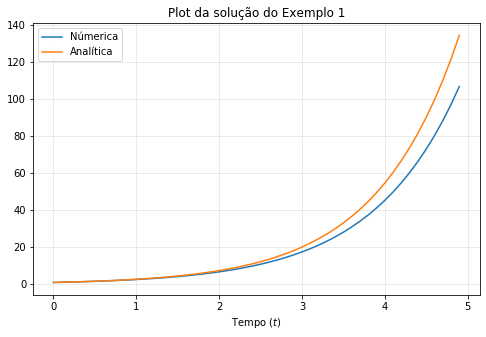

In [226]:
ts_1 = np.arange(0,5,0.1)
ys_1 = f_euler(dif_eq_1, 1, ts)
sol_1 = sol_eq_1(ts, 0, 1)

plotter(ts_1, [ys_1, sol_1], ['Númerica', 'Analítica'], 'Plot da solução do Exemplo 1')

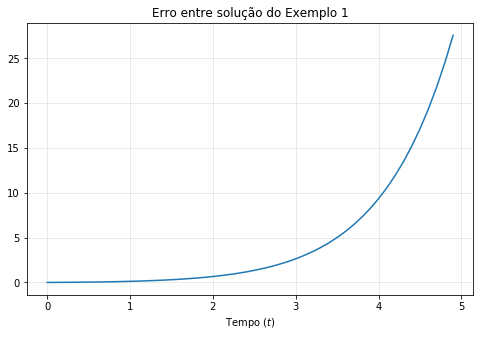

In [227]:
err_1 = erro(sol_1, [ys_1])
plotter(ts_1, err_1, title = 'Erro entre solução do Exemplo 1')

---
### Exemplo 2

In [228]:
def dif_eq_2(t, u, p = 0):
    return -5*u

def sol_eq_2(t, u, u0):
    return u0 * np.e**(-5*t)

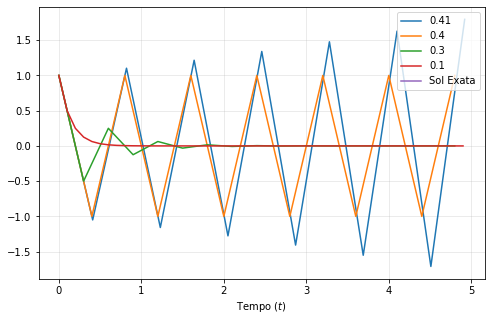

In [229]:
hs_2 = [0.41,0.4,0.3,0.1]
ts_2 = []
ys_2 = []
for h in hs_2:
    ts_2.append(np.arange(0,5,h))

for t in ts_2:
    ys_2.append(f_euler(dif_eq_2, 1, t))

sol_2 = sol_eq_2(ts_2[-1], 0, 1)
to_plot_2 = np.append(ys_2, sol_2)
to_plot_t_2 = np.append(ts_2, ts_2[-1])

plotter(to_plot_t_2, to_plot_2, hs_2+['Sol Exata'])

---
### Exemplo 3

In [230]:
def dif_eq_3(t, u, p = 0):
    return (u-t)/(u+t)

def sol_eq_3(t, u, u0):
    return u0 * np.e**(-5*t)

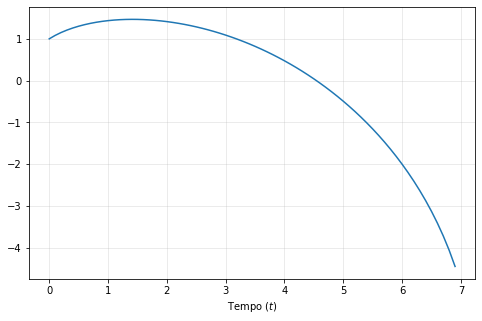

In [231]:
ts_3 = np.arange(0,7,0.1)
ys_3 = f_euler(dif_eq_3, 1, ts_3)
plotter(ts_3, [ys_3])